# MICROSOFT MOVIE STUDIO FILMS ANALYSIS.

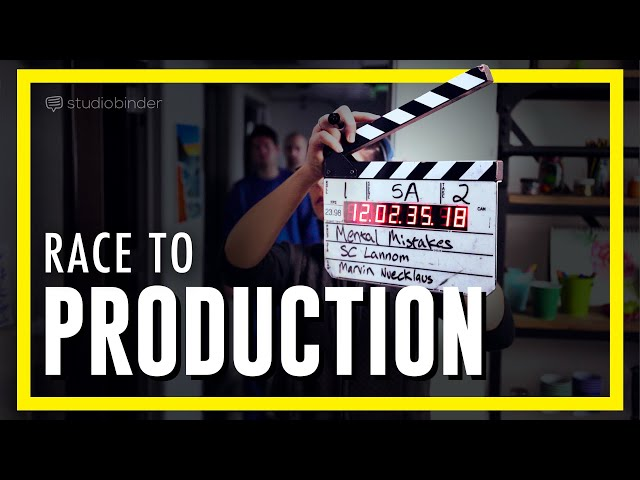

***

**Author: Brian Kipruto Ngeny.**

**Student pace: Full time.**

**Scheduled Project review date/time: 28-05-2023, 23:59:59.**

**Instructor's name: Mark Tiba.**

**Blog post URL:**

***

# OVERVIEW
This project analyzes the types of films currently doing the best on Box Office to find actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create. 

# 1. BUSINESS PROBLEM.

> ### a) __Introduction.__
Microsoft software company is creating a movie studio and thus, they want an analysis of the films that are currently doing the best on box office so as to gain insight into the types of films that are currently marktable. Since this is a new studio, we are going to acquire and analyze data from established movie studios and movie rating sites so as to gain knowledge and insight into the current scene of the movie industry. The results of this project could provide valuable information on the movie genres that are most popular right now and the ones that have stood the test of time. Thus, providing Microsoft movie studio with a good basis on where to begin with in film production. 

> ### b) __Problem statement.__
Like any new business venture, market analysis is an important step in the establishment of the business. It provides crucial information on market trends, peak seasons and recommendable product or services that can give a business a niche over the competition. 
To address this issue, I plan to use exploratory data analysis(EDA) to provide the head of Microsoft movie studio with actionable recommendations and insights into the type of films the studio should focus on producing so as to take the movie industry by storm and avoid making too many loses that may lead to the shutting down of the movie studio.

> ### c) __Objectives.__
The goal of this project is to;<br>
    1. Explore the data provided and determine which movies have the best ratings and the highest gross returns.<br>
    2. Analyze the findings of the exploratory data analysis model(EDA) and provide the company with actionable insights that answer the following specific business questions;<br>
    
        i) What is the mean, mode and outlier values for movie gross return values?
        ii) How does the domestic and foreign gross values relate to total gross? 
        iii) Does the popularity of a movie affect its final rating?
        iv) How does the production budget transalte to the gross returns?
        v) Which are the most popular and highest rated genres of movies currently?
        vi) Do higher movie ratings translate to higher gross returns? 

> ### d) __Project steps.__
This project will follow the following steps:<br>
    1. Business problem.<br>
    2. Data understanding.<br>
    3. Data preparation.<br>
    4. Data Analysis and Evaluation.<br>
    5. Conclusions and Recommendations

> ### e) __Data.__
The data used in this project is from the the following sources;<br> 
    1. Box Office Mojo.<br>
    2. IMDB.<br>
    3. Rotten Tomatoes.<br>
    4. The MovieDB.<br>
    5. The Numbers.

****************************************************************************************************************************

# 2. DATA UNDERSTANDING.
Within this step of the project flow, I am going to read the data provided from each respective file and load it into an associated dataframe object. This will enable me to preview each dataset and check the information that pertains to each dataset using the .info() method so as to understand the information contained in each dataset before moving to the next step which is data cleaning.   

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import random

%matplotlib inline

In [2]:
# read and preview box office mojo data
bom_data = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_data.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
bom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
# read and priview Rotten Tomatoes data
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [5]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [6]:
# read and preview The MovieDB data
tmdb_data = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tmdb_data.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [7]:
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [8]:
# read and preview The Numbers data
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [9]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [10]:
# read and preview IMDB table_names data
conn = sqlite3.connect("zippedData/im.db")
cur = conn.cursor()
imdb_table_data = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type='table'")]
print(imdb_table_data)
conn.close()

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [11]:
# read and preview data from the movie_ratings table
conn = sqlite3.connect("zippedData/im.db")
movie_ratings_query = ("SELECT * FROM movie_ratings")
movie_ratings = pd.read_sql(movie_ratings_query, conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [12]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [13]:
# read and priview data from the movie_basics table
movie_basics_query = ("SELECT * FROM movie_basics")
movie_basics = pd.read_sql(movie_basics_query, conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [14]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


This step of the project flow involves determining which of the datasets previewed above, contains the information relevant to answering the business questions possed in the project objectives. After visiually inspectiong the sample data from each of the dataset previewed, it is evident that that the only useful dataset are; 
> - bom_data sourced from Box office mojo.

This data represents a total of 3387 entries of individual movies with the variables being the title, studio, domestic_gross, foreign_gross and the year of its release. The target variables for this dataset are the title, domestic_gross and foreign_gross. This variables are essential in determining the gross returns for each film domestically, internationally and the total gross returns, the other columns will be dropped in the next step of the project.

> - tmdb_data sourced from The MovieDB.

This data represents a total of 26517 entries of individual films with the variables being the genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average and vote_count. The target variables are, the id, original_language, popularity, title and vote_average. These variables will help me determine how the orginal language of movie relates to the popularity of the movie and also how the popularity affects the rating of the movie using the vote_average as the rating index.

> - tn_movie_budgets data sourced from The Numbers.

This data represents a total of 5782 entries of individual movies with the variables being the id, release_date, movie, production_budget, domestic_gross and worldwide_gross. The target variables for this data are the id, movie, production_budget, domestic_gross and worldwide_gross. These variables will be usefull in determining the relationship between the amount of money allocated for the production budget and the subsequent gross returns both domestically and worldwide.

> - movie_ratings table sourced from IMDB database.

This data represents a total of 73856 entries of individual movies with the variables being movie_id, averagerating and numvotes. The target variables are the movie_id and averagerating which combined with the data from the next table i.e movie_basics, will be used to determine which genres of  movies have the highest ratings.  

> - movie_basics table sourced from IMDB database.

This data represents a total of 146144 entries of movies with the variables being the movie_id, primary_title, original_title, start_year, runtime_minutes and genre. The target variables for this dataset are the movie_id, original_title and genre. This table is going to be joined to the movie_ratings table and used to determine which genres of movies have the highest ratings on IMDB.

***

# 3. DATA PREPARATION.

### Data cleaning

Now that we have determined the relevant datasets, the next step is to clean the data acquired by digging deeper into each of the datasets so as to;
> I) Normalize the useful columns.<br>
> II) Drop the columns we won't need.<br>
> III) Identify any missing values and drop the rows.<br>
> IV) Engineer features or new columns where necessary.<br>
> V) Merge datasets if necessary.

### a) bom_data

In [15]:
# Strip the foreign_gross column of any commas
bom_data['foreign_gross'] = bom_data['foreign_gross'].replace(',', '', regex=True)

In [16]:
# Convert foreign_gross column values to numerical
bom_data['foreign_gross'] = pd.to_numeric(bom_data['foreign_gross'])
bom_data['foreign_gross'].dtype

dtype('float64')

In [17]:
# drop the studio and year columns from the dataframe
bom_data = bom_data.drop(['studio', 'year'], axis=1)
bom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   float64
dtypes: float64(2), object(1)
memory usage: 79.5+ KB


In [18]:
# now I drop the rows with null values
bom_data = bom_data.dropna(axis=0)
bom_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 0 to 3353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2009 non-null   object 
 1   domestic_gross  2009 non-null   float64
 2   foreign_gross   2009 non-null   float64
dtypes: float64(2), object(1)
memory usage: 62.8+ KB


In [19]:
# create a new column total_gross which is the sum of domestic_gross and foreign_gross
bom_data['total_gross'] = bom_data['domestic_gross'] + bom_data['foreign_gross']
bom_data.tail()

,title,domestic_gross,foreign_gross,total_gross
3275,I Still See You,1400.0,1500000.0,1501400.0
3286,The Catcher Was a Spy,725000.0,229000.0,954000.0
3309,Time Freak,10000.0,256000.0,266000.0
3342,Reign of Judges: Title of Liberty - Concept Short,93200.0,5200.0,98400.0
3353,Antonio Lopez 1970: Sex Fashion & Disco,43200.0,30000.0,73200.0


In [20]:
# Save cleaned dataset as CSV
bom_data.to_csv('zippedData/bom_data.csv')

### b) tmdb_data


In [21]:
# Normalize the vote_average column name
tmdb_data.columns = tmdb_data.columns.str.replace('vote_average', 'rating')
tmdb_data.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'rating', 'vote_count'],
      dtype='object')

In [22]:
# drop un-necessary columns
tmdb_data = tmdb_data.drop(['genre_ids', 'original_title', 'release_date', 'vote_count'], axis=1)
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   popularity         26517 non-null  float64
 4   title              26517 non-null  object 
 5   rating             26517 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.2+ MB


In [23]:
# drop any null rows
tmdb_data = tmdb_data.dropna(axis=0)
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   popularity         26517 non-null  float64
 4   title              26517 non-null  object 
 5   rating             26517 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.2+ MB


In [24]:
# Save cleaned dataset as CSV
tmdb_data.to_csv('zippedData/tmdb_data.csv')

### c) tn_movie_budgets

In [25]:
# drop the columns we do not need
tn_movie_budgets = tn_movie_budgets.drop('release_date', axis=1)
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(4)
memory usage: 226.0+ KB


In [26]:
# strip the $ and commas from the production_budget, domestic_gross and worldwide_gross columns
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace(',', '')
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace('$', '')
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace(',', '')
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace('$', '')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace(',', '')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('$', '')
tn_movie_budgets.head()

,id,movie,production_budget,domestic_gross,worldwide_gross
0,1,Avatar,425000000,760507625,2776345279
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,Dark Phoenix,350000000,42762350,149762350
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [27]:
# convert the production_budget, domestic_gross and worldwide_gross columns to numericals
tn_movie_budgets['production_budget'] = pd.to_numeric(tn_movie_budgets['production_budget'])
tn_movie_budgets['domestic_gross'] = pd.to_numeric(tn_movie_budgets['domestic_gross'])
tn_movie_budgets['worldwide_gross'] = pd.to_numeric(tn_movie_budgets['worldwide_gross'])
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 226.0+ KB


In [28]:
#drop any rows with null values
tn_movie_budgets = tn_movie_budgets.dropna(axis=0)
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 226.0+ KB


In [29]:
# Save cleaned dataset as CSV
tn_movie_budgets.to_csv('zippedData/tn_movie_budgets.csv')

### d) IMDB DATA
   ### i) movie_ratings

In [30]:
# drop the columns we do not need
movie_ratings = movie_ratings.drop('numvotes', axis=1)
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.1+ MB


In [31]:
# drop any rows with missing values
movie_ratings = movie_ratings.dropna(axis=0)
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.1+ MB


> ###  ii) movie_basics 

In [32]:
# drop the columns we do not need
movie_basics = movie_basics.drop(['primary_title', 'start_year', 'runtime_minutes'], axis=1)
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   movie_id        146144 non-null  object
 1   original_title  146123 non-null  object
 2   genres          140736 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [33]:
# drop any rows with missing values
movie_basics = movie_basics.dropna(axis=0)
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140734 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   movie_id        140734 non-null  object
 1   original_title  140734 non-null  object
 2   genres          140734 non-null  object
dtypes: object(3)
memory usage: 4.3+ MB


### imdb_data
I am going to create a new dataframe called imdb_data by merging movie_ratings and movie_basics dataframes.

In [34]:
# merge the two tabls to get one table called imdb_data and drop duplicate values
imdb_data = pd.merge(movie_ratings, movie_basics, on=['movie_id'], how='left')
imdb_data.drop_duplicates(subset=['movie_id', 'original_title'], keep='first', inplace=True)
imdb_data.head(10)

,movie_id,averagerating,original_title,genres
0,tt10356526,8.3,Laiye Je Yaarian,Romance
1,tt10384606,8.9,Borderless,Documentary
2,tt1042974,6.4,Just Inès,Drama
3,tt1043726,4.2,The Legend of Hercules,"Action,Adventure,Fantasy"
4,tt1060240,6.5,Até Onde?,"Mystery,Thriller"
5,tt1069246,6.2,Habana Eva,"Comedy,Romance"
6,tt1094666,7.0,Hamill,"Biography,Drama,Sport"
7,tt1130982,6.4,Avant l'aube,"Drama,Thriller"
8,tt1156528,7.2,Circus Fantasticus,"Drama,War"
9,tt1161457,4.2,The Vanquisher,"Action,Adventure,Sci-Fi"


In [35]:
# Save cleaned dataset as CSV
imdb_data.to_csv('zippedData/imdb_data.csv')

***

# DATA ANALYSIS AND EVALUATION.

Beginning with data from box office mojo, I am going to explore and discover the mean, minimum, maximum and outlier values for domestic gross, foreign gross and the total gross for the movies represented in the data set.

In [36]:
# stastical data for bom_data domestic_gross column
print("Domestic gross")
print(bom_data['domestic_gross'].describe().astype('int64'))
print()
print("Foreign gross")
print(bom_data['foreign_gross'].describe().astype('int64'))
print()
print("Total gross")
print(bom_data['total_gross'].describe().astype('int64'))

Domestic gross
count         2009
mean      46973114
std       81599661
min            400
25%         665000
50%       16500000
75%       56000000
max      936700000
Name: domestic_gross, dtype: int64

Foreign gross
count         2009
mean      75718219
std      138129649
min            600
25%        3900000
50%       19300000
75%       75900000
max      960500000
Name: foreign_gross, dtype: int64

Total gross
count          2009
mean      122691333
std       207487031
min            4900
25%         8141000
50%        42300000
75%       133700000
max      1518900000
Name: total_gross, dtype: int64


The average domestic gross for a movie is 46,973,114 dollars. The lowest amount on record is 400 dollars and the highest amount on record is 936,700,000 dollars.<br>
The average foreign gross for a movie is 75,718,219 dollars. The lowest amount on record is 600 dollars and the highest amount on record is 960,500,000 dollars.<br>
The average total gross for a movie is 122,691,333 dollars. The lowest amount on record is 4900 dollars and the highest amount on record is 1,518,900,000 dollars.<br>
The outliers shall be determined in the box plot below.

Text(0.5, 1.0, 'Box office mojo gross spread')

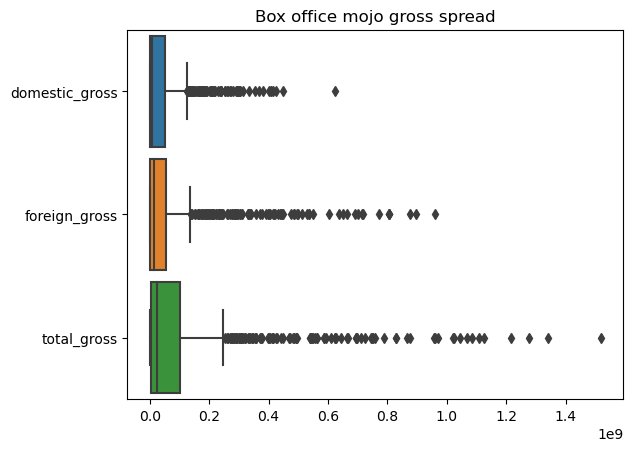

In [62]:
# plotting a boxplot to determine the spread of gross returns for a random number of movies

# get a random variable for number of values to be considered
head = random.randint(509, 1509)

bom_data_ax = sns.boxplot(bom_data.head(head), width=0.9, orient='h')
bom_data_ax.set_title('Box office mojo gross spread')

It is evident from the figure above that most of the outliers are found above the general spread of the data provided. This translates to movies being capable of fetching more money than is ussually anticipated or aproximated.

***

Next, I analyze the data from The movieDB, I will explore the original languages of the most produced movies and their avareage ratings, then try and determine if there is a relationship between popularity and rating of movies.

In [48]:
# verify which 5 languages have the highest number of movies produced
print("Ranking of original language groupings")
print(tmdb_data['original_language'].value_counts().head(10))

print()
# determine which 5 languages for movie production have the highest ratings
print("Average rating for language groups")
print(tmdb_data.groupby('original_language')['rating'].mean().sort_values(ascending=False).head(10))

Ranking of original language groupings
original_language
en    23291
fr      507
es      455
ru      298
ja      265
de      237
zh      177
hi      172
it      123
pt       96
Name: count, dtype: int64

Average rating for language groups
original_language
dz    10.000000
ne     8.300000
ur     8.027273
cy     8.000000
gu     7.933333
hu     7.761111
sw     7.700000
ka     7.314286
bs     7.250000
mr     7.240000
Name: rating, dtype: float64


#### Disclaimer!!!
##### It is impossible to decode the meaning of the abbreviations used in the original_language column without the key to provide the meaning of each abrreviation.<br>
<br>
That being said, I can still infer that English, French and Spanish movies are the most produced movies but not the highest rated movies are evidenced by the average rating of movies grouped by their original languages.

Text(0.5, 1.0, 'Relationship between popularity and rating')

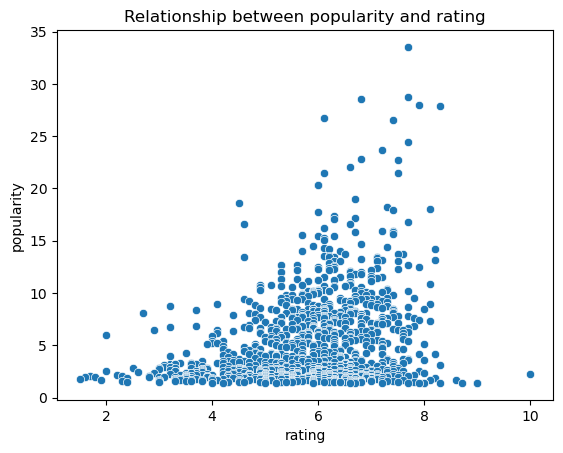

In [61]:
# plotting a scatterplot to determine the relationship between popularity and the rating for movies

tmdb_data_ax = sns.scatterplot(tmdb_data.head(head), y='popularity', x='rating')
tmdb_data_ax.set_title('Relationship between popularity and rating')

From the scatterplot, I can deduce that there is no concrete relationship between the popularity of a movie and the rating of the movie. Popular movies can have low ratings just as unpopular movies can have high ratings.

In [32]:
grouped = imdb_data.groupby('genres')['averagerating'].mean().sort_values(ascending=False)
grouped

genres
Comedy,Documentary,Fantasy    9.4
Documentary,Family,Musical    9.3
History,Sport                 9.2
Music,Mystery                 9.0
Game-Show                     9.0
                             ... 
Crime,Music                   2.4
History,Sci-Fi,Thriller       2.3
Adventure,Crime,Romance       2.3
Adult,Horror                  2.0
Comedy,Musical,Sport          1.4
Name: averagerating, Length: 923, dtype: float64